MACHINE_LEARNING MODELS

LOGISTIC REGRESSION (CLASSIFICATION MODEL)

In [12]:
# IMPORTED LIBRARIES

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# Load the CSV file into a pandas dataframe
df = pd.read_csv("C:/nasoindiadev/interns-20222023/dataanalytics/samp.csv")

Accuracy: 0.9875
Confusion Matrix:
 [[51  0]
 [ 1 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           1       1.00      0.97      0.98        29

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



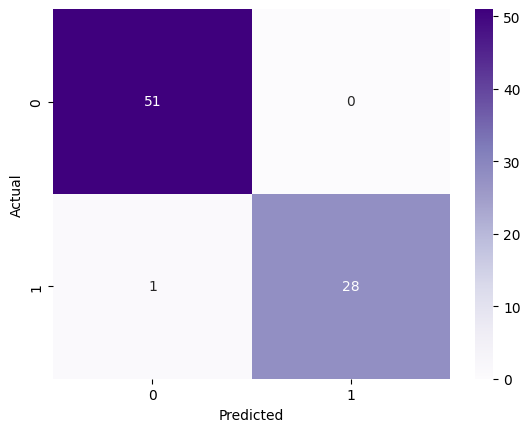

    traveltime  studytime  performance  parentincome  G1  G2  G3  shortlisted
0            2          4           90         65000   5  13   6            1
1            2          1           40        450000   9   5   6            0
2            1          3           80        400000   7   8  10            0
3            1          2           60        300000  15  14  15            0
4            2          3           80        450000   6  10  10            0
5            3          1           40         65000  14  14  14            1
6            4          1           40         70000  10  10  11            1
7            1          4           90        400000  14  16  16            0
8            1          2           60        200000  14  14  14            0
9            1          4           90        300000  13  14  14            0
10           2          4           90        400000  16   2   6            0
11           1          1           40        400000   5  19   6

In [23]:
# training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['traveltime', 'studytime', 'performance', 'parentincome', 'G1', 'G2', 'G3']], data['shortlisted'], test_size=0.2, random_state=42)

# logistic regression model 
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# predictions_actual
y_pred = lr_model.predict(X_test)


# Evaluate accuracy 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))


# plot confusion matrix
sns.heatmap(cm, annot=True, cmap="Purples")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#new data frame:
new_data = pd.read_csv("C:/nasoindiadev/interns-20222023/dataanalytics/samp1.csv")

#predictions_new CSV
new_X = new_data[['traveltime', 'studytime', 'performance', 'parentincome', 'G1', 'G2', 'G3']]
new_data['shortlisted'] = lr_model.predict(new_X)

print(new_data[['traveltime', 'studytime', 'performance', 'parentincome', 'G1', 'G2', 'G3', 'shortlisted']])

K-MEANS_CLUSTERING (CLUSTERING MODEL)

In [36]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

         inc   percent  internet
0   0.080460  0.260870       1.0
1   0.000000  0.217391       0.0
2   0.540230  0.402174       0.0
3   0.770115  0.750000       1.0
4   0.034483  0.423913       1.0
5   0.310345  0.760870       1.0
6   0.885057  0.586957       1.0
7   0.885057  0.239130       0.0
8   1.000000  0.913043       1.0
9   0.885057  0.750000       1.0
10  0.540230  0.423913       1.0
11  0.000000  0.565217       1.0
12  0.885057  0.706522       1.0
13  1.000000  0.510870       1.0
14  0.885057  0.782609       0.0
15  0.011494  0.706522       0.0
16  0.011494  0.695652       1.0
17  0.000000  0.456522       0.0
18  1.000000  0.217391       0.0
19  0.000000  0.456522       0.0


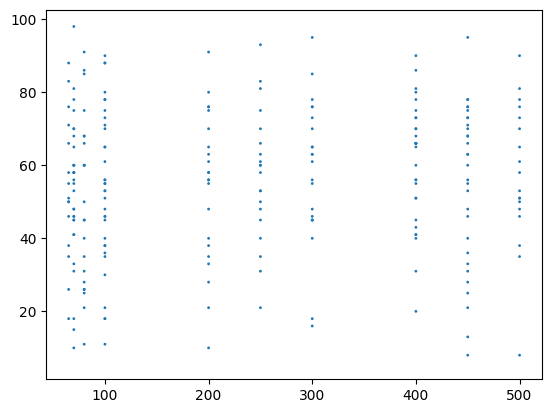

In [93]:

data = pd.read_csv("C:/nasoindiadev/interns-20222023/dataanalytics/sampl.csv")
plt.scatter(data['inc'], data['percent'], data['internet'])

columns = ['inc', 'percent', 'internet']
X = data[columns]

# normalisation - StandardScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# scaled data and column names
scaled_df = pd.DataFrame(X_scaled, columns=columns)

# scaled data
print(scaled_df.head(20))

[10199881.554999998]
[10199881.554999998, 2025551.7502006155]
[10199881.554999998, 2025551.7502006155, 563207.8164564207]
[10199881.554999998, 2025551.7502006155, 563207.8164564207, 409855.6661296232]
[10199881.554999998, 2025551.7502006155, 563207.8164564207, 409855.6661296232, 268499.5699712756]
[10199881.554999998, 2025551.7502006155, 563207.8164564207, 409855.6661296232, 268499.5699712756, 217840.48634390888]
[10199881.554999998, 2025551.7502006155, 563207.8164564207, 409855.6661296232, 268499.5699712756, 217840.48634390888, 175874.380822753]
[10199881.554999998, 2025551.7502006155, 563207.8164564207, 409855.6661296232, 268499.5699712756, 217840.48634390888, 175874.380822753, 137112.83486272502]
[10199881.554999998, 2025551.7502006155, 563207.8164564207, 409855.6661296232, 268499.5699712756, 217840.48634390888, 175874.380822753, 137112.83486272502, 118794.48538795291]


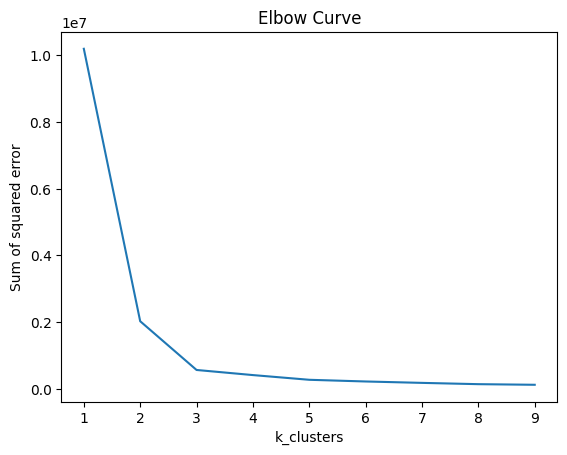

In [81]:

k_rng = range(1,10)
sse = []
for k in k_rng:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(data[['inc', 'percent', 'internet']])
    sse.append(kmeans.inertia_)
    print(sse)
    
    
#elbow plot

plt.plot(k_rng, sse)
plt.xlabel('k_clusters')
plt.ylabel('Sum of squared error')
plt.title('Elbow Curve')
plt.show()

In [82]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_scaled)
pred_y


data['cluster'] = pred_y
data.head(15)

,student,gender,age,region,traveltime,studytime,performance,parentincome,activities,educatedparent,...,G1,G2,G3,total,percentage,percent,result,shortlisted,inc,cluster
0,1,female,18,urban,2,2,60,450,0,1,...,5,6,6,18,30.000000,30.0,1,0,100,0
1,2,female,17,urban,1,1,40,100,0,0,...,5,5,6,16,26.666667,26.0,0,1,65,1
2,3,female,15,urban,1,2,60,65,0,0,...,7,8,10,26,43.333333,43.0,1,1,300,1
3,4,female,15,urban,1,3,80,300,1,1,...,15,14,15,45,75.000000,75.0,1,0,400,2
4,5,female,16,urban,1,4,90,500,0,1,...,6,10,10,27,45.000000,45.0,1,0,80,0
5,6,male,16,urban,1,2,60,400,1,1,...,15,15,15,46,76.666667,76.0,1,0,200,0
6,7,male,16,urban,1,2,60,500,0,1,...,12,12,11,36,60.000000,60.0,1,0,450,2
7,8,female,17,urban,2,4,90,70,0,0,...,6,5,6,17,28.333333,28.0,0,1,450,1
8,9,male,15,urban,1,2,60,400,0,1,...,16,18,19,54,90.000000,90.0,1,0,500,2
9,10,male,15,urban,1,3,80,300,1,1,...,14,15,15,45,75.000000,75.0,1,0,450,2


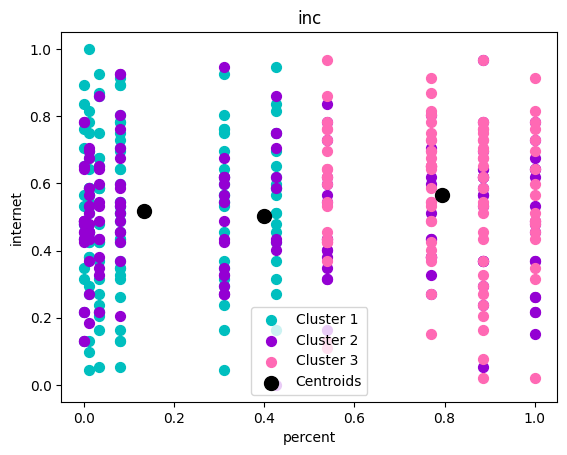

In [91]:

plt.scatter(X_scaled[pred_y == 0, 0], X_scaled[pred_y == 0, 1], s = 50, c = 'c', label = 'Cluster 1')
plt.scatter(X_scaled[pred_y == 1, 0], X_scaled[pred_y == 1, 1], s = 50, c = '#9400D3', label = 'Cluster 2')
plt.scatter(X_scaled[pred_y == 2, 0], X_scaled[pred_y == 2, 1], s = 50, c = 'hotpink', label = 'Cluster 3')
#plt.scatter(X_scaled[pred_y == 3, 0], X_scaled[pred_y == 3, 1], s = 50, c = 'hotpink', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title('inc')
plt.xlabel('percent')
plt.ylabel('internet')
plt.legend()
plt.show()

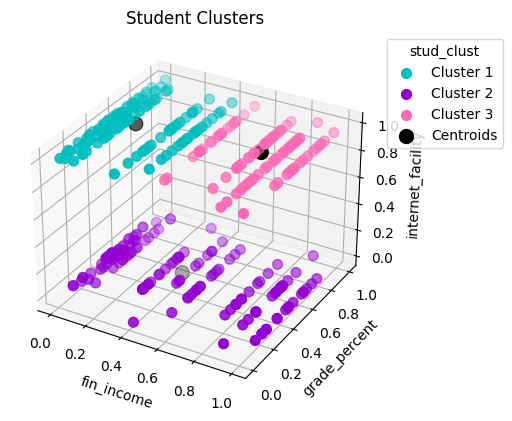

In [94]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_scaled[pred_y == 0, 0], X_scaled[pred_y == 0, 1], X_scaled[pred_y == 0, 2], s = 50, c = 'c', label = 'Cluster 1')
ax.scatter(X_scaled[pred_y == 1, 0], X_scaled[pred_y == 1, 1], X_scaled[pred_y == 1, 2], s = 50, c = '#9400D3', label = 'Cluster 2')
ax.scatter(X_scaled[pred_y == 2, 0], X_scaled[pred_y == 2, 1], X_scaled[pred_y == 2, 2], s = 50, c = 'hotpink', label = 'Cluster 3')
#ax.scatter(X_scaled[pred_y == 3, 0], X_scaled[pred_y == 3, 1], X_scaled[pred_y == 3, 2], s = 50, c = 'hotpink', label = 'Cluster 4')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s = 100, c = 'black', label = 'Centroids')

ax.set_xlabel('fin_income')
ax.set_ylabel('grade_percent')
ax.set_zlabel('internet_facility')
plt.title('Student Clusters')
plt.legend(title = "stud_clust", bbox_to_anchor=(1, 1))
plt.show()